In [1]:
import pandas as pd
from prophet import Prophet 
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [2]:
data = pd.read_feather('database/base.feather')

22:19:30 - cmdstanpy - INFO - Chain [1] start processing
22:19:30 - cmdstanpy - INFO - Chain [1] done processing


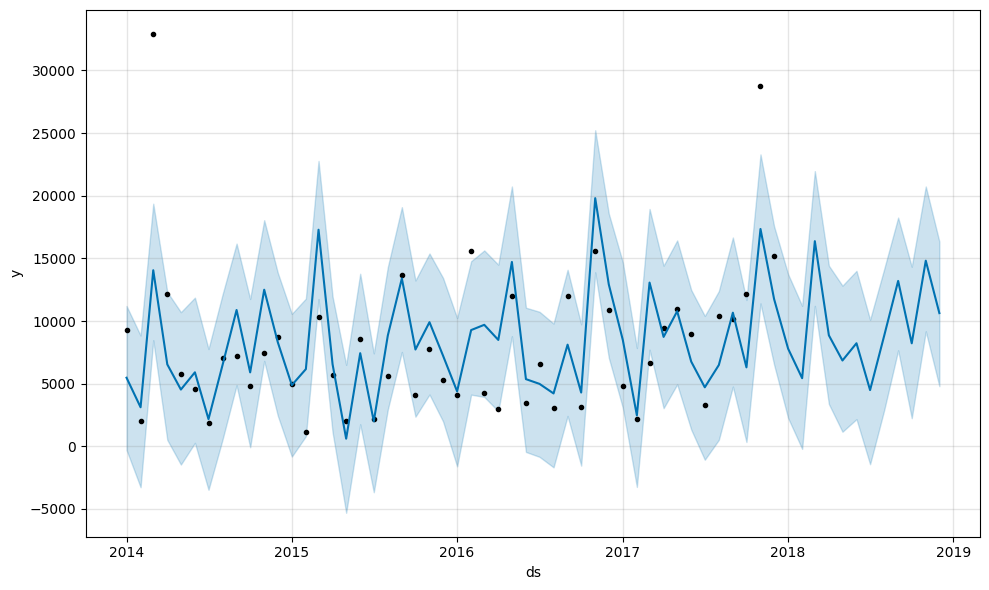

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:31 - cmdstanpy - INFO - Chain [1] start processing
22:19:31 - cmdstanpy - INFO - Chain [1] done processing


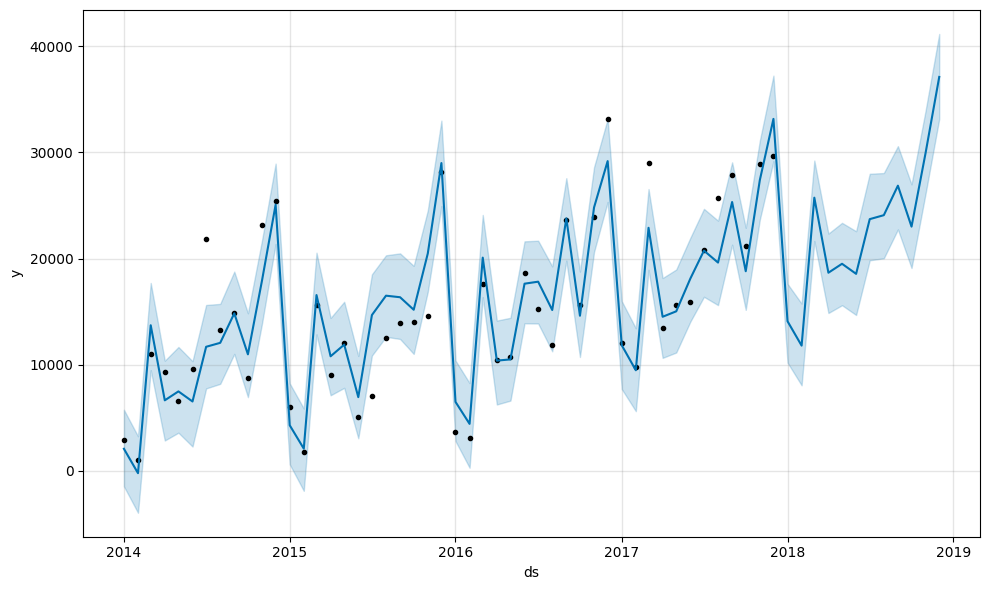

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:32 - cmdstanpy - INFO - Chain [1] start processing
22:19:32 - cmdstanpy - INFO - Chain [1] done processing


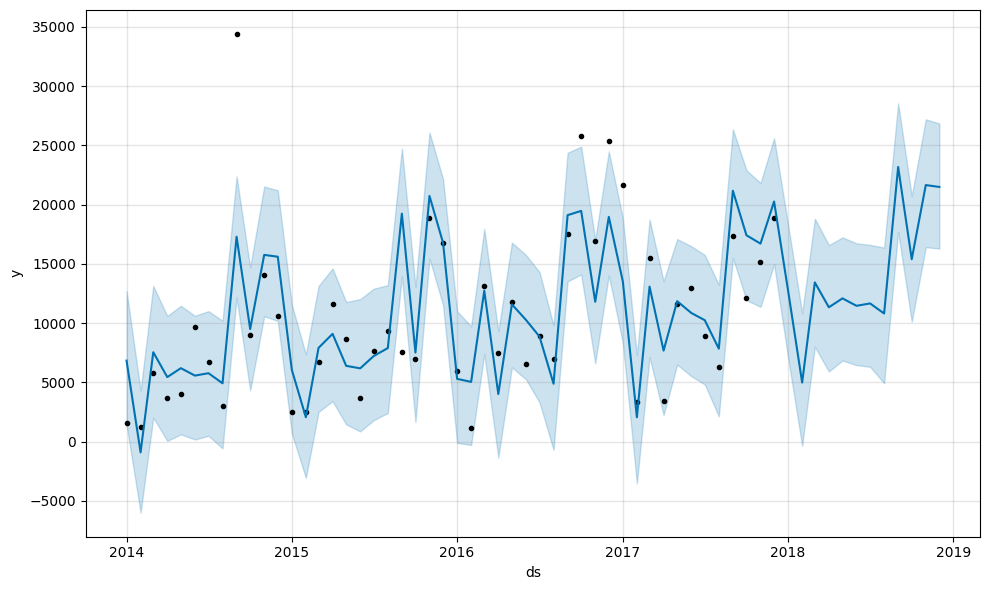

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:33 - cmdstanpy - INFO - Chain [1] start processing
22:19:33 - cmdstanpy - INFO - Chain [1] done processing


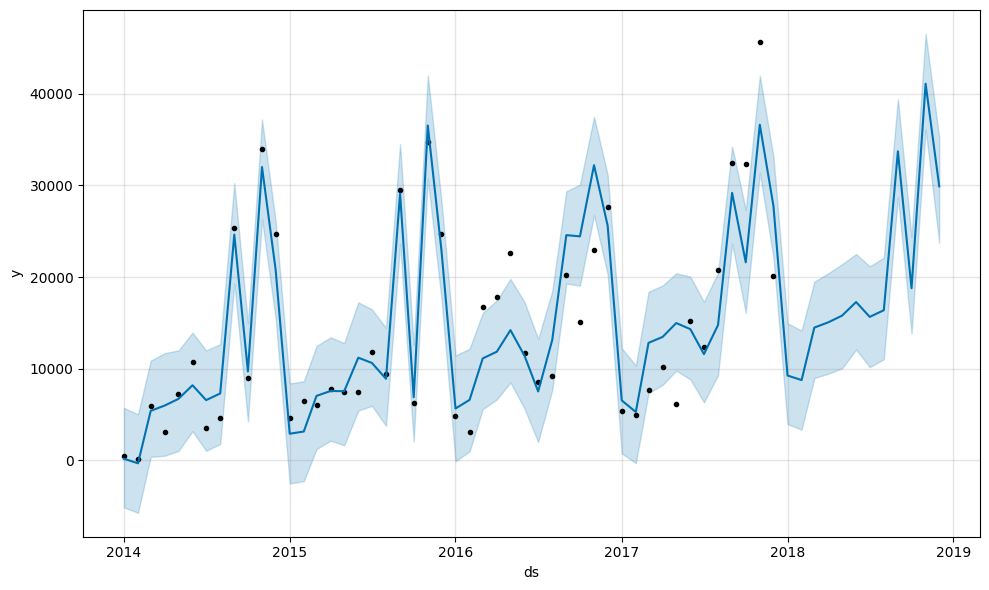

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:34 - cmdstanpy - INFO - Chain [1] start processing
22:19:34 - cmdstanpy - INFO - Chain [1] done processing


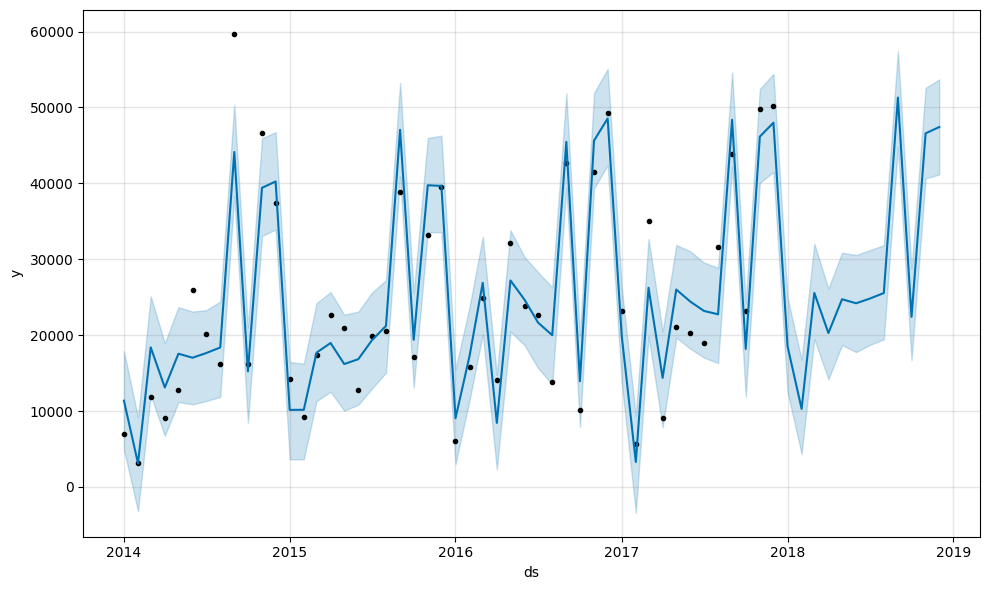

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:35 - cmdstanpy - INFO - Chain [1] start processing
22:19:36 - cmdstanpy - INFO - Chain [1] done processing


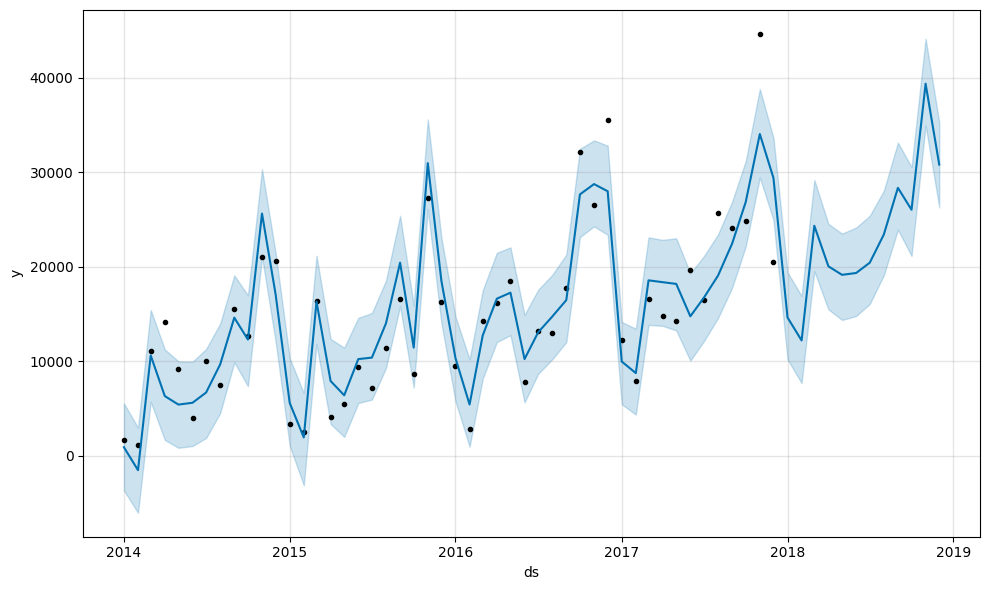

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(
22:19:36 - cmdstanpy - INFO - Chain [1] start processing
22:19:37 - cmdstanpy - INFO - Chain [1] done processing


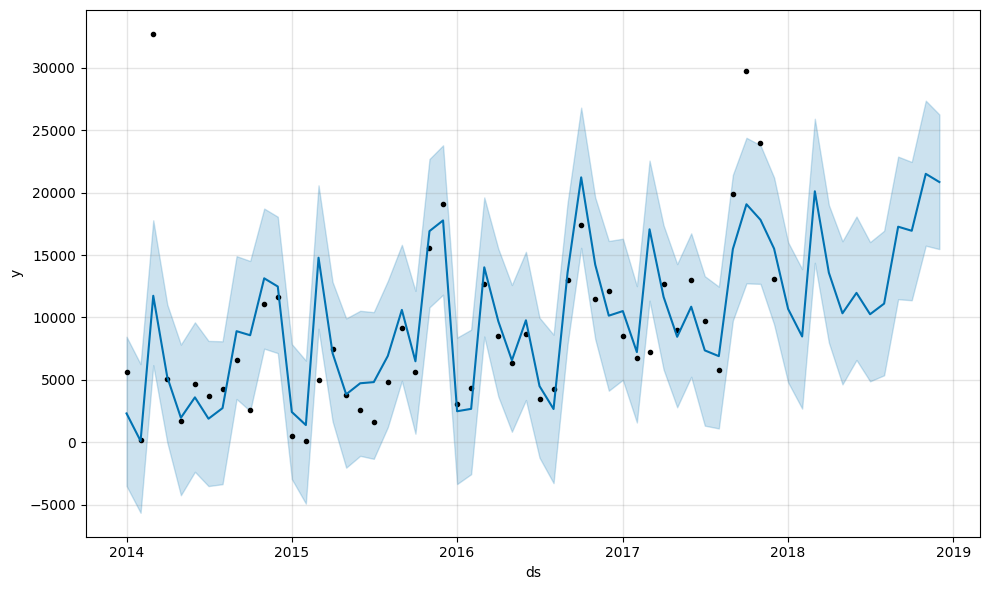

/tmp/ipykernel_4044/811090991.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retorno = retorno.append(


In [4]:
variaveis = ['Region', 'Segment']
for variavel in variaveis:
    retorno = pd.DataFrame()
    for var in data[variavel].unique():
        regressao = data[data[variavel] == var][['Order Date Month', 'Sales']].groupby('Order Date Month')['Sales'].sum().reset_index()
        regressao = regressao.rename(columns={'Order Date Month': 'ds', 'Sales': 'y'})
        m = Prophet().fit(regressao)
        future = m.make_future_dataframe(periods=12, freq='MS')
        forecast = m.predict(future)
        forecast[variavel] = var 
        fig1 = m.plot(forecast)
        plt.show()
        retorno = retorno.append(
            forecast[[variavel, 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
            ignore_index = True
        )
    retorno.to_feather('database/regressao_{}.feather'.format(variavel))